# The Battle of Neighborhoods: North Augusta

## IBM Capstone Objectives:

This project, and associated files, were produced as to meet the final objectives of Coursera's IBM Applied Data Science Capstone Certificate program. The following sections are the objectives in meeting this criteria.

Section 1: Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.
This submission will eventually become your Introduction/Business Problem section in your final report. So I recommend that you push the report (having your Introduction/Business Problem section only for now) to your Github repository and submit a link to it.

Section 2: Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.
This submission will eventually become your Data section in your final report. So I recommend that you push the report (having your Data section) to your Github repository and submit a link to it. 

## Section 1: Project Background

This project has been designed as someone moving to the North Augusta, SC who is interested in venues in the area.

#### Analytic Purpose and Problem:
as a transplant to the North Augusta area, it's incredibly hard to learn about the culture and venues, while out of state. With this analytic, I'll have a resource

### Location:

North Augusta and surrounding areas is quickly expanding from a rural, Southern town to a town of transplant residents, many of which work in and around Fort Gordon.

### Libraries Employed:

Pandas: for manipulating data frames.
Folium: python data visualization library, used to visualize neighborhood clusters on an interactive map.
Scikit Learn: mathmatic library, employed for k-means clustering.
JSON: library to handle JSON files.
XML: seperates data, allowing XML data to be displayed in plain text.
Geocoder: retrieves locational data.
BeautifulSoup with Requests: library allows program to scrap http, handling online request.
Matplotlib: Python plotting module.
ArcGis: used to manage mapping.
FourSquareAPI: used to identify venues in the area.

#### Installing/Importing Python Libraries and Dependancies

In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analysis
import requests
!pip install folium # map rendering library
import folium # map rendering library
!pip install geocoder
import geocoder

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import BeautifulSoup 4
from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


## Section 2: Data Sources, Extraction, Cleaning

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!pip install selenium

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported!')

Libraries imported!


In [4]:
# DATA USED IS AN UPLOADED JSON FILE TO GITHUB
json_data = 'https://raw.githubusercontent.com/dchorrox/Coursera_Capstone/master/us_cities-coordinates.json'
json_data

'https://raw.githubusercontent.com/dchorrox/Coursera_Capstone/master/us_cities-coordinates.json'

In [5]:
df = pd.read_json(json_data, orient='columns')

In [6]:
df.head(10)

,City Name,County Code,County Name,Density,Id,Latitude,Longitude,Source,State Id,State Name,Timezone
0,Prairie Ridge,53053,Pierce,1349.8,1840037882,47.1443,-122.1408,polygon,WA,Washington,America/Los_Angeles
1,Edison,53057,Skagit,127.4,1840017314,48.5602,-122.4311,polygon,WA,Washington,America/Los_Angeles
2,Packwood,53041,Lewis,213.9,1840025265,46.6085,-121.6702,polygon,WA,Washington,America/Los_Angeles
3,Wautauga Beach,53035,Kitsap,261.7,1840037725,47.5862,-122.5482,point,WA,Washington,America/Los_Angeles
4,Harper,53035,Kitsap,342.1,1840037659,47.5207,-122.5196,point,WA,Washington,America/Los_Angeles
5,Telma,53007,Chelan,1.4,1840037825,47.8432,-120.8157,point,WA,Washington,America/Los_Angeles
6,Kahlotus,53021,Franklin,156.0,1840018478,46.6436,-118.5566,polygon,WA,Washington,America/Los_Angeles
7,Mondovi,53043,Lincoln,9.4,1840037576,47.6813,-118.0164,point,WA,Washington,America/Los_Angeles
8,Washtucna,53001,Adams,108.0,1840022312,46.7539,-118.3104,polygon,WA,Washington,America/Los_Angeles
9,Pleasant Hill,53033,King,25.8,1840037805,47.6154,-121.9096,point,WA,Washington,America/Los_Angeles


In [7]:
df.shape
print('The dataframe has', df.shape, 'rows and columns respectively.')

The dataframe has (36651, 11) rows and columns respectively.


In [8]:
df.rename(columns={'State Id': 'State', 'County Name':'County', 'County Code':'County_Code', 'City Name':'Neighborhood'}, inplace=True)
df.head()

,Neighborhood,County_Code,County,Density,Id,Latitude,Longitude,Source,State,State Name,Timezone
0,Prairie Ridge,53053,Pierce,1349.8,1840037882,47.1443,-122.1408,polygon,WA,Washington,America/Los_Angeles
1,Edison,53057,Skagit,127.4,1840017314,48.5602,-122.4311,polygon,WA,Washington,America/Los_Angeles
2,Packwood,53041,Lewis,213.9,1840025265,46.6085,-121.6702,polygon,WA,Washington,America/Los_Angeles
3,Wautauga Beach,53035,Kitsap,261.7,1840037725,47.5862,-122.5482,point,WA,Washington,America/Los_Angeles
4,Harper,53035,Kitsap,342.1,1840037659,47.5207,-122.5196,point,WA,Washington,America/Los_Angeles


## Sampling South Carolina

In [9]:
# Sample South Carolina Data
SC_data = df[df.State == 'SC']
SC_data.head()

,Neighborhood,County_Code,County,Density,Id,Latitude,Longitude,Source,State,State Name,Timezone
8216,Vaucluse,45003,Aiken,24.0,1840035835,33.6126,-81.8098,point,SC,South Carolina,America/New_York
8217,Eureka,45003,Aiken,51.1,1840035820,33.6940,-81.7671,point,SC,South Carolina,America/New_York
8218,Montmorenci,45003,Aiken,91.8,1840035811,33.5279,-81.6365,point,SC,South Carolina,America/New_York
8219,Bath,45003,Aiken,702.1,1840035759,33.5046,-81.8690,point,SC,South Carolina,America/New_York
8220,Millett,45005,Allendale,1.2,1840035771,33.0813,-81.5357,point,SC,South Carolina,America/New_York


In [10]:
cols = [0,2,3,5,6,8]
SC_data = SC_data[SC_data.columns[cols]]
SC_data.head().reset_index()

,index,Neighborhood,County,Density,Latitude,Longitude,State
0,8216,Vaucluse,Aiken,24.0,33.6126,-81.8098,SC
1,8217,Eureka,Aiken,51.1,33.6940,-81.7671,SC
2,8218,Montmorenci,Aiken,91.8,33.5279,-81.6365,SC
3,8219,Bath,Aiken,702.1,33.5046,-81.8690,SC
4,8220,Millett,Allendale,1.2,33.0813,-81.5357,SC


### Testing Data from known location: Municipal Building

In [11]:
address = '100 Georgia Avenue, North Augusta, SC 29841'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('North Augustas Municipal Building is located at 100 Georgia Avenue North Augusta, SC 29841; coordinates {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


North Augustas Municipal Building is located at 100 Georgia Avenue North Augusta, SC 29841; coordinates 33.487984, -81.972105.


## Installing Folium to map data

In [12]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [14]:
# create map of South Carolina using latitude and longitude values
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city, county in zip(SC_data['Latitude'], SC_data['Longitude'], SC_data['Neighborhood'], SC_data['County']):
    label = '{}, {}'.format(county, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(map) 
map

### Segmenting North Augusta's, Aiken County

North Augusta is split between Aiken and Edgefield counties. Simplifying Aiken County allows for an indepth analysis of an area where many residents live and produces more results than edgefield.

In [16]:
#####################
aiken_data = SC_data[SC_data.County == 'Aiken']
aiken_data.drop(aiken_data.index[7], inplace=True)
print('The dataframe has', aiken_data.shape, 'rows and columns respectively.')
aiken_data.reset_index()

The dataframe has (19, 6) rows and columns respectively.


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,index,Neighborhood,County,Density,Latitude,Longitude,State
0,8216,Vaucluse,Aiken,24.0,33.6126,-81.8098,SC
1,8217,Eureka,Aiken,51.1,33.6940,-81.7671,SC
2,8218,Montmorenci,Aiken,91.8,33.5279,-81.6365,SC
3,8219,Bath,Aiken,702.1,33.5046,-81.8690,SC
4,16065,Langley,Aiken,263.3,33.5121,-81.8343,SC
5,16066,Gloverville,Aiken,457.1,33.5274,-81.8145,SC
6,16067,Clearwater,Aiken,614.1,33.5038,-81.9100,SC
7,16069,Graniteville,Aiken,685.2,33.5646,-81.8079,SC
8,16070,Belvedere,Aiken,717.8,33.5369,-81.9424,SC
9,35672,Windsor,Aiken,71.0,33.4812,-81.5129,SC


#### Gather location for Aiken County 

In [17]:
address = 'Aiken, SC'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Aiken, SC are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of Aiken, SC are 33.5598586, -81.721952.


#### Visualize Aiken County Data

### FourSquare API:

This project's data sources will include the FourSquare API, crowd sourcing information from around the world. This API allows for following roll-outs of this code to enable user location searches, expanding this analyitic for similar use globally.

FourSquare's API will be leveraged as a locational data source. It can be accessed here: https://foursquare.com/

##### Define User FourSquare Credentials and Version

In [18]:
CLIENT_ID = ('F0UVEPL1QURPOE4MJXO0NBJGFVY3L1B23DMIP2WCRPD0WXL0')
CLIENT_SECRET = ('OGTJLNKJBUCJNLEAU10RFO5PXID1USKR1PAU2FILWSQ5VAVC')
VERSION = 20180604
print("Your credentails")
print('CLIENT ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentails
CLIENT ID: F0UVEPL1QURPOE4MJXO0NBJGFVY3L1B23DMIP2WCRPD0WXL0
CLIENT_SECRET: OGTJLNKJBUCJNLEAU10RFO5PXID1USKR1PAU2FILWSQ5VAVC


##### Query FourSquare for Aiken venues

In [19]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=F0UVEPL1QURPOE4MJXO0NBJGFVY3L1B23DMIP2WCRPD0WXL0&client_secret=OGTJLNKJBUCJNLEAU10RFO5PXID1USKR1PAU2FILWSQ5VAVC&v=20180604&ll=33.5598586,-81.721952&radius=500&limit=100'

##### Using Get request and FourSquare API requestto examine venues in the area

In [20]:
results = requests.get(url).json()

# Extract FourSquare venue category
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

##### Handling FourSquare, JSON Dataframe

In [21]:
venues = results ['response']['groups'][0]['items']

# flatten (normalize) results
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc [:, filtered_columns]

#filter categories by row, then clean columns
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis = 1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()


,name,categories,lat,lng
0,Mellow Mushroom,Pizza Place,33.559652,-81.722350
1,The Pizza Joint,Pizza Place,33.560580,-81.720481
2,Malia's Restaurant,American Restaurant,33.560732,-81.722366
3,New Moon Cafe,Café,33.562184,-81.721923
4,The Alley Downtown Taproom,Beer Garden,33.560168,-81.722022


In [22]:
print('{} venues found using FourSquare.' .format(nearby_venues.shape[0]))

20 venues found using FourSquare.


##### Aiken County Exploration

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

aiken_venues = getNearbyVenues(names=aiken_data['Neighborhood'],
                                   latitudes=aiken_data['Latitude'],
                                   longitudes=aiken_data['Longitude']
                                  )

Vaucluse
Eureka
Montmorenci
Bath
Langley
Gloverville
Clearwater
Graniteville
Belvedere
Windsor
Monetta
Perry
Salley
Wagener
Jackson
New Ellenton
Burnettown
North Augusta
Aiken


In [24]:
print('There are', aiken_venues.shape, 'rows and columns venues and neighborhoods in Aiken County.')
aiken_venues.head(10)

There are (55, 7) rows and columns venues and neighborhoods in Aiken County.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Vaucluse,33.6126,-81.8098,United States Postal Service,33.612982,-81.804797,Post Office
1,Vaucluse,33.6126,-81.8098,Sage Valley Gun Club,33.615263,-81.812716,Hunting Supply
2,Montmorenci,33.5279,-81.6365,United States Postal Service,33.527503,-81.633585,Post Office
3,Bath,33.5046,-81.8690,Ming Ming Chinese Restaurant,33.506251,-81.865781,Chinese Restaurant
4,Bath,33.5046,-81.8690,BP,33.506049,-81.865109,Gas Station
5,Bath,33.5046,-81.8690,Buddy Cains Peanuts,33.506205,-81.865784,Snack Place
6,Langley,33.5121,-81.8343,MrQuickPick® Unlock My Car!,33.511307,-81.829777,Locksmith
7,Clearwater,33.5038,-81.9100,Mi Rancho,33.500686,-81.906795,Mexican Restaurant
8,Clearwater,33.5038,-81.9100,The Helm,33.500172,-81.906888,Bar
9,Graniteville,33.5646,-81.8079,Blue Top Grill,33.561214,-81.805437,American Restaurant


##### Aiken Neighborhood Bars

Text(0, 0.5, 'Venue Count')

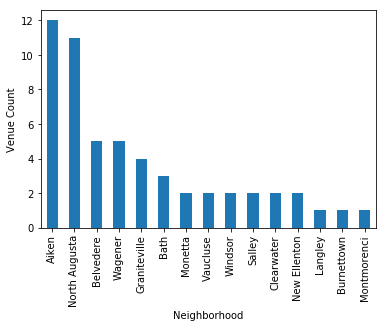

In [25]:
plot1=aiken_venues["Neighborhood"].value_counts().plot(kind = "bar")
plot1.set_xlabel('Neighborhood')
plot1.set_ylabel('Venue Count')

##### Neighborhood Venues

In [26]:
aiken_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aiken,12,12,12,12,12,12
Bath,3,3,3,3,3,3
Belvedere,5,5,5,5,5,5
Burnettown,1,1,1,1,1,1
Clearwater,2,2,2,2,2,2
Graniteville,4,4,4,4,4,4
Langley,1,1,1,1,1,1
Monetta,2,2,2,2,2,2
Montmorenci,1,1,1,1,1,1


In [27]:
print('There are {} uniques categories.'.format(len(aiken_venues['Venue Category'].unique())))

There are 33 uniques categories.


In [28]:
# one hot encoding
aiken_onehot = pd.get_dummies(aiken_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
aiken_onehot['Neighborhood'] = aiken_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [aiken_onehot.columns[-1]] + list(aiken_onehot.columns[:-1])
aiken_onehot = aiken_onehot[fixed_columns]

aiken_onehot.head()

,Neighborhood,American Restaurant,Arts & Crafts Store,Auto Garage,BBQ Joint,Bar,Beach,Café,Chinese Restaurant,Convenience Store,Deli / Bodega,Diner,Discount Store,Fast Food Restaurant,Financial or Legal Service,Fried Chicken Joint,Gas Station,Gift Shop,Grocery Store,Hunting Supply,Liquor Store,Locksmith,Massage Studio,Mexican Restaurant,Office,Pharmacy,Pizza Place,Pool Hall,Post Office,Scenic Lookout,Seafood Restaurant,Snack Place,Thai Restaurant,Thrift / Vintage Store
0,Vaucluse,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Vaucluse,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Montmorenci,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Bath,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bath,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
aiken_onehot.shape
print('The dataframe has', aiken_onehot.shape, 'rows and columns respectively.')

The dataframe has (55, 34) rows and columns respectively.


In [30]:
aiken_grouped = aiken_onehot.groupby('Neighborhood').mean().reset_index()
aiken_grouped

,Neighborhood,American Restaurant,Arts & Crafts Store,Auto Garage,BBQ Joint,Bar,Beach,Café,Chinese Restaurant,Convenience Store,Deli / Bodega,Diner,Discount Store,Fast Food Restaurant,Financial or Legal Service,Fried Chicken Joint,Gas Station,Gift Shop,Grocery Store,Hunting Supply,Liquor Store,Locksmith,Massage Studio,Mexican Restaurant,Office,Pharmacy,Pizza Place,Pool Hall,Post Office,Scenic Lookout,Seafood Restaurant,Snack Place,Thai Restaurant,Thrift / Vintage Store
0,Aiken,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.083333,0.0,0.083333,0.000000,0.083333,0.0,0.083333,0.0,0.000000,0.0,0.083333,0.0,0.000000,0.083333,0.0,0.000000,0.250000,0.083333,0.0,0.0,0.000000,0.000000,0.083333,0.083333
1,Bath,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.333333,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.000000
2,Belvedere,0.00,0.000000,0.2,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.2,0.000000,0.2,0.000000,0.2,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,Burnettown,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000
4,Clearwater,0.00,0.000000,0.0,0.0,0.5,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.500000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
5,Graniteville,0.25,0.000000,0.0,0.0,0.0,0.25,0.0,0.250000,0.0,0.000000,0.0,0.250000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
6,Langley,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
7,Monetta,0.00,0.000000,0.0,0.0,0.0,0.00,0.5,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.5,0.0,0.000000,0.000000,0.000000,0.000000
8,Montmorenci,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000
9,New Ellenton,0.00,0.000000,0.0,0.5,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.5,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


Neighborhoods with top 10 venues

In [31]:
num_top_venues = 10

for hood in aiken_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = aiken_grouped[aiken_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aiken----
                        venue  freq
0                 Pizza Place  0.25
1      Thrift / Vintage Store  0.08
2                 Gas Station  0.08
3          Mexican Restaurant  0.08
4  Financial or Legal Service  0.08
5              Discount Store  0.08
6                Liquor Store  0.08
7               Deli / Bodega  0.08
8                   Pool Hall  0.08
9             Thai Restaurant  0.08


----Bath----
                 venue  freq
0          Gas Station  0.33
1          Snack Place  0.33
2   Chinese Restaurant  0.33
3  American Restaurant  0.00
4             Pharmacy  0.00
5            Locksmith  0.00
6       Massage Studio  0.00
7   Mexican Restaurant  0.00
8               Office  0.00
9            Pool Hall  0.00


----Belvedere----
                venue  freq
0           Gift Shop   0.2
1              Office   0.2
2           Locksmith   0.2
3      Hunting Supply   0.2
4         Auto Garage   0.2
5         Snack Place   0.0
6  Seafood Restaurant   0.0
7      Sceni

##### Sort Values in Decending Order

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = aiken_grouped['Neighborhood']

for ind in np.arange(aiken_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(aiken_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aiken,Pizza Place,Thrift / Vintage Store,Discount Store,Gas Station,Thai Restaurant,Deli / Bodega,Liquor Store,Mexican Restaurant,Pool Hall,Financial or Legal Service
1,Bath,Snack Place,Gas Station,Chinese Restaurant,Thrift / Vintage Store,Convenience Store,Financial or Legal Service,Fast Food Restaurant,Discount Store,Diner,Deli / Bodega
2,Belvedere,Gift Shop,Locksmith,Hunting Supply,Office,Auto Garage,BBQ Joint,Bar,Beach,Café,Chinese Restaurant
3,Burnettown,Scenic Lookout,Thrift / Vintage Store,Chinese Restaurant,Financial or Legal Service,Fast Food Restaurant,Discount Store,Diner,Deli / Bodega,Convenience Store,Café
4,Clearwater,Bar,Mexican Restaurant,Thrift / Vintage Store,Convenience Store,Financial or Legal Service,Fast Food Restaurant,Discount Store,Diner,Deli / Bodega,Chinese Restaurant
5,Graniteville,American Restaurant,Beach,Chinese Restaurant,Discount Store,Gas Station,Arts & Crafts Store,Auto Garage,BBQ Joint,Bar,Café
6,Langley,Locksmith,Thrift / Vintage Store,Convenience Store,Financial or Legal Service,Fast Food Restaurant,Discount Store,Diner,Deli / Bodega,Chinese Restaurant,Gas Station
7,Monetta,Café,Post Office,Chinese Restaurant,Financial or Legal Service,Fast Food Restaurant,Discount Store,Diner,Deli / Bodega,Convenience Store,Thrift / Vintage Store
8,Montmorenci,Post Office,Thrift / Vintage Store,Chinese Restaurant,Financial or Legal Service,Fast Food Restaurant,Discount Store,Diner,Deli / Bodega,Convenience Store,Café
9,New Ellenton,BBQ Joint,Fried Chicken Joint,Thrift / Vintage Store,Gas Station,Arts & Crafts Store,Auto Garage,Bar,Beach,Café,Chinese Restaurant


In [33]:
neighborhoods_venues_sorted.shape
print('The dataframe has', neighborhoods_venues_sorted.shape, 'rows and columns respectively.')

The dataframe has (15, 11) rows and columns respectively.


#### Aiken County Neighborhoods Clustered

In [34]:
# set number of clusters
kclusters = 4

aiken_grouped_clustering = aiken_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(aiken_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 3, 2, 1, 1, 0, 0, 1], dtype=int32)

In [35]:
# Dataframe for Aiken Data

aiken_merged = aiken_data

# add clustering labels
aiken_merged['Cluster Labels'] = kmeans
aiken_merged.dropna(inplace=True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
aiken_merged = aiken_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

aiken_merged

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Neighborhood,County,Density,Latitude,Longitude,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8216,Vaucluse,Aiken,24.0,33.6126,-81.8098,SC,"KMeans(algorithm='auto', copy_x=True, init='k-...",Hunting Supply,Post Office,Thrift / Vintage Store,Chinese Restaurant,Fast Food Restaurant,Discount Store,Diner,Deli / Bodega,Convenience Store,Café
8217,Eureka,Aiken,51.1,33.6940,-81.7671,SC,"KMeans(algorithm='auto', copy_x=True, init='k-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8218,Montmorenci,Aiken,91.8,33.5279,-81.6365,SC,"KMeans(algorithm='auto', copy_x=True, init='k-...",Post Office,Thrift / Vintage Store,Chinese Restaurant,Financial or Legal Service,Fast Food Restaurant,Discount Store,Diner,Deli / Bodega,Convenience Store,Café
8219,Bath,Aiken,702.1,33.5046,-81.8690,SC,"KMeans(algorithm='auto', copy_x=True, init='k-...",Snack Place,Gas Station,Chinese Restaurant,Thrift / Vintage Store,Convenience Store,Financial or Legal Service,Fast Food Restaurant,Discount Store,Diner,Deli / Bodega
16065,Langley,Aiken,263.3,33.5121,-81.8343,SC,"KMeans(algorithm='auto', copy_x=True, init='k-...",Locksmith,Thrift / Vintage Store,Convenience Store,Financial or Legal Service,Fast Food Restaurant,Discount Store,Diner,Deli / Bodega,Chinese Restaurant,Gas Station
16066,Gloverville,Aiken,457.1,33.5274,-81.8145,SC,"KMeans(algorithm='auto', copy_x=True, init='k-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16067,Clearwater,Aiken,614.1,33.5038,-81.9100,SC,"KMeans(algorithm='auto', copy_x=True, init='k-...",Bar,Mexican Restaurant,Thrift / Vintage Store,Convenience Store,Financial or Legal Service,Fast Food Restaurant,Discount Store,Diner,Deli / Bodega,Chinese Restaurant
16069,Graniteville,Aiken,685.2,33.5646,-81.8079,SC,"KMeans(algorithm='auto', copy_x=True, init='k-...",American Restaurant,Beach,Chinese Restaurant,Discount Store,Gas Station,Arts & Crafts Store,Auto Garage,BBQ Joint,Bar,Café
16070,Belvedere,Aiken,717.8,33.5369,-81.9424,SC,"KMeans(algorithm='auto', copy_x=True, init='k-...",Gift Shop,Locksmith,Hunting Supply,Office,Auto Garage,BBQ Joint,Bar,Beach,Café,Chinese Restaurant
35672,Windsor,Aiken,71.0,33.4812,-81.5129,SC,"KMeans(algorithm='auto', copy_x=True, init='k-...",Convenience Store,Liquor Store,Thrift / Vintage Store,Financial or Legal Service,Fast Food Restaurant,Discount Store,Diner,Deli / Bodega,Chinese Restaurant,Gas Station


In [36]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(aiken_merged['Latitude'], aiken_merged['Longitude'], aiken_merged['Neighborhood'], aiken_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow,
        fill=True,
        fill_color=rainbow,
        fill_opacity=0.7).add_to(map_clusters)
    
        
      
from folium.plugins import FloatImage
image_file = 'https://www.carolana.com/SC/Legislators/Images/sc_election_districts_map_02.jpg'
FloatImage(image_file, bottom=0, left=70).add_to(map_clusters)
map_clusters

<Figure size 720x720 with 0 Axes>

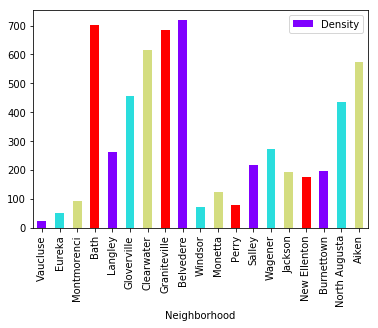

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

aiken_merged.plot(kind='bar',x='Neighborhood',y='Density', color=rainbow)
plt.show()